In [39]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
import seaborn as sns

In [6]:
df = pd.read_csv("loan_data.csv")

In [7]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
df["person_age"].value_counts()

person_age
23.0     5254
24.0     5138
25.0     4507
22.0     4236
26.0     3659
27.0     3095
28.0     2728
29.0     2455
30.0     2021
31.0     1645
32.0     1403
21.0     1289
33.0     1240
34.0      980
35.0      847
36.0      740
37.0      666
38.0      503
39.0      389
40.0      349
41.0      303
42.0      247
43.0      215
44.0      177
45.0      135
46.0      114
47.0      112
48.0       93
49.0       59
50.0       56
51.0       46
52.0       42
53.0       35
54.0       24
55.0       24
58.0       20
56.0       20
57.0       17
20.0       17
60.0       16
61.0       12
66.0       11
65.0       10
70.0        7
64.0        7
62.0        7
59.0        6
69.0        5
144.0       3
73.0        3
63.0        3
123.0       2
78.0        1
94.0        1
80.0        1
84.0        1
76.0        1
67.0        1
116.0       1
109.0       1
Name: count, dtype: int64

In [12]:
df["person_gender"].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [14]:
df["person_education"].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [16]:
df["person_emp_exp"].value_counts()

person_emp_exp
0      9566
2      4134
1      4061
3      3890
4      3524
       ... 
101       1
124       1
125       1
121       1
85        1
Name: count, Length: 63, dtype: int64

In [18]:
df["person_home_ownership"].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [19]:
df["loan_status"].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [20]:
df["previous_loan_defaults_on_file"].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [22]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [30]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [32]:
def convert_float_to_int(column):
    for i in column:
        df[i] = df[i].astype("int64")
        
columns = ["person_age","person_income","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length"]        
convert_float_to_int(columns)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   person_age                      45000 non-null  int64 
 1   person_gender                   45000 non-null  object
 2   person_education                45000 non-null  object
 3   person_income                   45000 non-null  int64 
 4   person_emp_exp                  45000 non-null  int64 
 5   person_home_ownership           45000 non-null  object
 6   loan_amnt                       45000 non-null  int64 
 7   loan_intent                     45000 non-null  object
 8   loan_int_rate                   45000 non-null  int64 
 9   loan_percent_income             45000 non-null  int64 
 10  cb_person_cred_hist_length      45000 non-null  int64 
 11  credit_score                    45000 non-null  int64 
 12  previous_loan_defaults_on_file  45000 non-null

In [35]:
def convert_object_to_int(column):
    for i in column:
        df_label_encoder = LabelEncoder()
        df[i] = df_label_encoder.fit_transform(df[i])
columns = ["person_gender","person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file"]
convert_object_to_int(columns)

In [36]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,4,71948,0,3,35000,4,16,0,3,561,0,1
1,21,0,3,12282,0,2,1000,1,11,0,2,504,1,0
2,25,0,3,12438,3,0,5500,3,12,0,3,635,0,1
3,23,0,1,79753,0,3,35000,3,15,0,2,675,0,1
4,24,1,4,66135,1,3,35000,3,14,0,4,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971,6,3,15000,3,15,0,3,645,0,1
44996,37,0,0,65800,17,3,9000,2,14,0,11,621,0,1
44997,33,1,0,56942,7,3,2771,0,10,0,10,668,0,1
44998,29,1,1,33164,4,3,12000,1,13,0,6,604,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   person_age                      45000 non-null  int64
 1   person_gender                   45000 non-null  int64
 2   person_education                45000 non-null  int64
 3   person_income                   45000 non-null  int64
 4   person_emp_exp                  45000 non-null  int64
 5   person_home_ownership           45000 non-null  int64
 6   loan_amnt                       45000 non-null  int64
 7   loan_intent                     45000 non-null  int64
 8   loan_int_rate                   45000 non-null  int64
 9   loan_percent_income             45000 non-null  int64
 10  cb_person_cred_hist_length      45000 non-null  int64
 11  credit_score                    45000 non-null  int64
 12  previous_loan_defaults_on_file  45000 non-null  int64
 13  l

<Axes: xlabel='person_gender', ylabel='Count'>

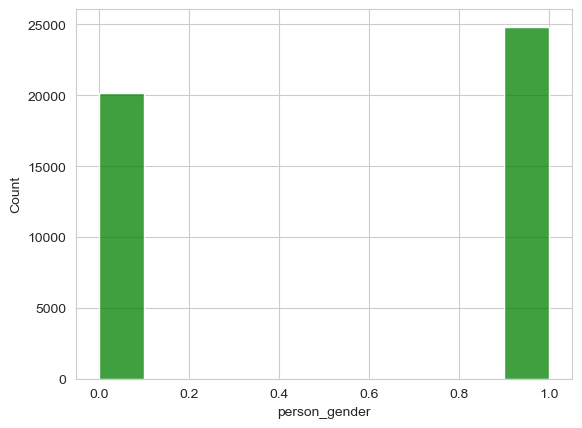

In [41]:
sns.set_style('whitegrid')
sns.histplot(df['person_gender'],color ='green', bins = 10)

<Axes: xlabel='person_education', ylabel='Count'>

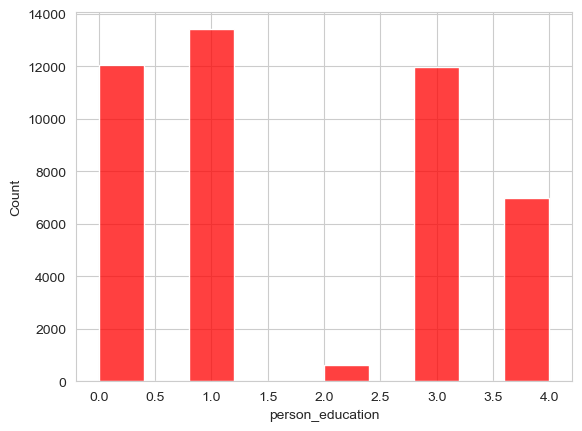

In [40]:
sns.set_style('whitegrid')
sns.histplot(df['person_education'],color ='red', bins = 10)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   person_age                      45000 non-null  int64
 1   person_gender                   45000 non-null  int64
 2   person_education                45000 non-null  int64
 3   person_income                   45000 non-null  int64
 4   person_emp_exp                  45000 non-null  int64
 5   person_home_ownership           45000 non-null  int64
 6   loan_amnt                       45000 non-null  int64
 7   loan_intent                     45000 non-null  int64
 8   loan_int_rate                   45000 non-null  int64
 9   loan_percent_income             45000 non-null  int64
 10  cb_person_cred_hist_length      45000 non-null  int64
 11  credit_score                    45000 non-null  int64
 12  previous_loan_defaults_on_file  45000 non-null  int64
 13  l

In [43]:
x = df.drop(columns = ["loan_status"])

In [44]:
x

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22,0,4,71948,0,3,35000,4,16,0,3,561,0
1,21,0,3,12282,0,2,1000,1,11,0,2,504,1
2,25,0,3,12438,3,0,5500,3,12,0,3,635,0
3,23,0,1,79753,0,3,35000,3,15,0,2,675,0
4,24,1,4,66135,1,3,35000,3,14,0,4,586,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,1,0,47971,6,3,15000,3,15,0,3,645,0
44996,37,0,0,65800,17,3,9000,2,14,0,11,621,0
44997,33,1,0,56942,7,3,2771,0,10,0,10,668,0
44998,29,1,1,33164,4,3,12000,1,13,0,6,604,0


In [45]:
y = df["loan_status"]

In [46]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [47]:
x_train , x_test,y_train ,y_test = train_test_split(x,y,test_size = 0.2,stratify = y,random_state =2)

In [48]:
print(x.shape , x_train.shape , x_test.shape)

(45000, 13) (36000, 13) (9000, 13)


In [49]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\LENOVO\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
x_train_prediction = model.predict(x_train)
trainning_accuracy_score = accuracy_score(x_train_prediction,y_train)

In [51]:
print(trainning_accuracy_score)

0.84175


In [52]:
x_test_prediction = model.predict(x_test)
trainning_accuracy_score = accuracy_score(x_test_prediction,y_test)
trainning_accuracy_score

0.842

In [54]:
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10,20],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2,3]
}

grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [56]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20]})

In [57]:
model= RandomForestClassifier(
    n_estimators=50,
    max_depth=20,
    max_samples=0.75,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Train the model
model.fit(x_train, y_train)


RandomForestClassifier(max_depth=20, max_samples=0.75, n_estimators=50,
                       random_state=42)

In [58]:
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9246


In [60]:
y_pred = model.predict(x_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9929
